Note: All of the model fits presented here have been pre-run using the script `choice_models.py`. This can take a lot of time to run.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context('paper')

fig_size = (4.5, 2.0)

# Experiment 1

In [2]:
loo = pd.read_pickle('Data/model_fits/model_fits_exp_lin.pkl').sort_values('LOO')
summary = pd.read_pickle('Data/model_fits/model_params_exp_lin_rbf_cls.pkl')
loo

,LOO,LOO_se,p_LOO,shape_warn
GP-RBF/Clustering,51423.545067,424.499452,385.233537,1
Linear/Clustering,53652.000256,422.527828,319.484642,1
GP-RBF/Kalman,53652.620514,422.534691,319.163747,1
Clustering,54121.496627,424.809565,218.976804,1
Kalman,54122.157548,424.828126,219.394059,1
GP-RBF,55613.788485,432.336853,328.383103,1
Bayesian-GP,58137.534089,438.439840,278.864156,1
Lin-Reg,71422.248629,452.491382,264.966515,1
Scrambled,74097.900166,457.744119,120.255454,1


In [3]:
# calculate chance
n = len(pd.read_csv('Data/exp_linear/rbfpred.csv')) # n_subj * n_trails_per_subj
n_arms = 8
chance_loo = -2 * n * np.log(1. / n_arms)

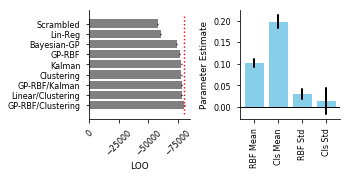

In [4]:
def plot_results(loo, summary, chance_loo):
    fig, axes = plt.subplots(1, 2, figsize=fig_size, gridspec_kw=dict(wspace=0.5))
    ax = axes[0]
    min_loo = np.min(loo.LOO - chance_loo)
    with sns.axes_style('ticks'):
        plt.sca(ax)
        ax.barh(range(len(loo.LOO.values)), 
                 loo.LOO.values - chance_loo, color='grey', align='center')
        ax.set_yticks(range(len(loo.LOO.values)))
        ax.set_yticklabels(loo.index.tolist())
        ax.errorbar(y = range(len(loo.LOO.values)), 
                    x = loo.LOO.values - chance_loo,
                    xerr = loo.LOO_se.values, linestyle='None',
                    color='k',
                   )
        xlb, xub = plt.gca().get_xlim()
        ylb, yub = plt.gca().get_ylim()

        ax.plot([min_loo, min_loo],[ylb, yub], 'r:')
        ax.set_xlim([xub, xlb])
        sns.despine()

#         ax.set_xticks([-80000., -70000.,  -60000.])
#         ax.set_xticklabels([r'$-8\times10^4$', r'$-7\times10^4$', 
#                             r'$-6\times10^4$'])
        ax.set_xlabel('LOO')
        plt.xticks(rotation=45)

        #### second plot
        ax = axes[1]
        plt.sca(ax)

        vars_  = ['mu_beta_rbf_mean', 'mu_beta_cls_mean', 
                  'mu_beta_rbf_stdv', 'mu_beta_cls_stdv',]
        labels = ['RBF Mean', 'Cls Mean', 'RBF Std', 'Cls Std']

        y = summary.loc[vars_, 'mean'].values
        plt.bar(range(4), y, color='skyblue')

        for ii, b in enumerate(vars_):
            ylb = summary.loc[b, 'hpd_2.5']
            yub = summary.loc[b, 'hpd_97.5']
            ax.plot([ii,ii], [ylb, yub], 'k', linewidth=2)
        plt.xticks(range(len(y)))
        ax.set_xticklabels(labels)

        ax.axhline(y=0, color='k', linewidth=1)

        plt.ylabel('Parameter Estimate')
        plt.xticks(rotation=90)
        ax.xaxis.label.set_visible(False)
        return fig

_ = plot_results(loo, summary, chance_loo)

# Experiment Change Point

In [5]:
loo = pd.read_pickle('Data/model_fits/model_fits_exp_cp.pkl').sort_values('LOO')
summary = pd.read_pickle('Data/model_fits/model_params_exp_cp_rbf_cls.pkl')
loo

,LOO,LOO_se,p_LOO,shape_warn
GP-RBF/Kalman,81323.941682,479.878689,395.103116,1
Linear/Clustering,81323.994177,479.876519,395.236678,1
GP-RBF/Clustering,81325.406960,479.877466,395.935827,1
Kalman,81774.806889,481.775447,291.963381,1
Clustering,81776.347222,481.782409,292.895383,1
Bayesian-GP,83465.422383,462.760712,304.099840,1
GP-RBF,100584.716005,483.323023,375.036625,1
Lin-Reg,101423.755973,484.530571,220.037589,1


In [6]:
# note, GP-RBF/Clustering and Linear clustering are indistinguishable for this model

In [7]:
# calculate chance
n = len(pd.read_csv('Data/exp_changepoint/changerbfpred.csv')) # n_subj * n_trails_per_subj
n_arms = 8
chance_loo = -2 * n * np.log(1. / n_arms)

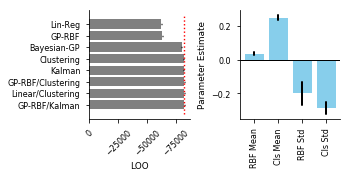

In [8]:
_ = plot_results(loo, summary, chance_loo)

# Experiment Scrambled

In [9]:
loo = pd.read_pickle('Data/model_fits/model_fits_exp_scram.pkl').sort_values('LOO')
summary = pd.read_pickle('Data/model_fits/model_params_exp_scram_rbf_cls.pkl')
loo

,LOO,LOO_se,p_LOO,shape_warn
GP-RBF/Clustering,43858.175944,377.763555,311.721060,1
Linear/Clustering,45248.992712,377.569572,269.507152,1
GP-RBF/Kalman,45251.443890,377.572884,270.145476,1
Kalman,45592.315077,378.716824,187.427419,1
Clustering,45595.940702,378.727403,189.231037,1
GP-RBF,47144.564512,383.442492,277.471653,1
Bayesian-GP,47438.683217,383.125824,192.688981,1
Lin-Reg,59843.580073,389.632792,197.662594,1
Scrambled,61617.446734,392.639567,109.770939,1


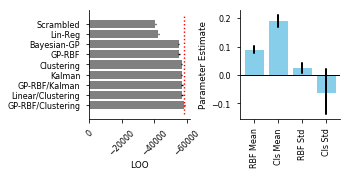

In [10]:
# calculate chance
n = len(pd.read_csv('Data/exp_scrambled/gprbfscrambled.csv')) # n_subj * n_trails_per_subj
n_arms = 8
chance_loo = -2 * n * np.log(1. / n_arms)

_ = plot_results(loo, summary, chance_loo)

# Experiment Shifted

In [11]:
loo = pd.read_pickle('Data/model_fits/model_fits_exp_shifted.pkl').sort_values('LOO')
summary = pd.read_pickle('Data/model_fits/model_params_exp_shifted_rbf_cls.pkl')
loo

,LOO,LOO_se,p_LOO,shape_warn
GP-RBF/Clustering,93550.474611,477.185323,504.583309,1
GP-RBF/Kalman,100946.782357,468.233124,471.959822,1
Linear/Clustering,100949.175983,468.220908,472.582036,1
GP-RBF,101133.200966,470.569418,481.165562,1
Clustering,103176.607294,467.884898,282.810095,1
Kalman,103177.894853,467.922901,283.160061,1
Bayesian-GP,109823.165807,457.807441,451.854555,1
Lin-Reg,115895.964440,444.243539,397.193240,1
Scrambled,120707.485074,429.801318,133.308267,1


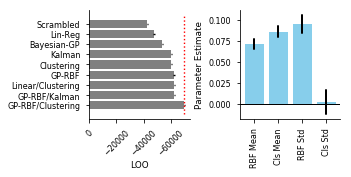

In [12]:
# calculate chance
n = len(pd.read_csv('Data/exp_shifted/gprbfshifted.csv')) # n_subj * n_trails_per_subj
n_arms = 8
chance_loo = -2 * n * np.log(1. / n_arms)

_ = plot_results(loo, summary, chance_loo)

# Experiment SRS

In [13]:
loo = pd.read_pickle('Data/model_fits/model_fits_exp_srs.pkl').sort_values('LOO')
summary = pd.read_pickle('Data/model_fits/model_params_exp_srs_rbf_cls.pkl')
loo

,LOO,LOO_se,p_LOO,shape_warn
GP-RBF/Clustering,63591.068344,443.057297,435.022449,1
GP-RBF/Kalman,65930.905966,443.375515,358.349433,1
Linear/Clustering,65932.360612,443.335323,358.459648,1
Kalman,66260.191911,444.532243,258.276111,1
Clustering,66262.397727,444.585014,259.249507,1
GP-RBF,68145.964115,449.706803,371.165819,1
Bayesian-GP,69447.723773,450.577691,310.722561,1
Lin-Reg,86065.490931,451.208158,319.419699,1
Scrambled,88242.298341,452.617119,128.821336,1


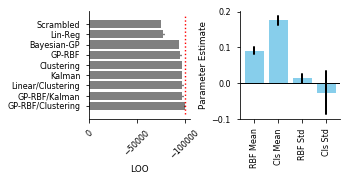

In [14]:
# calculate chance
n = len(pd.read_csv('Data/exp_shifted/gprbfshifted.csv')) # n_subj * n_trails_per_subj
n_arms = 8
chance_loo = -2 * n * np.log(1. / n_arms)

_ = plot_results(loo, summary, chance_loo)